In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


tf.estimator package not installed.
tf.estimator package not installed.


# Recurrent Neural Networks
<center><img src="https://github.com/jordanott/DeepLearning/blob/master/Figures/sparkling_lr.png?raw=true" width=800>

# Machine Translation
<center><img src='https://smerity.com/media/images/articles/2016/gnmt_arch_1_enc_dec.svg'>

# Speech Recognition
![](https://cdn-images-1.medium.com/max/1600/1*nJNxFmJaHxyJTtVFkhGTlg.png)

# Image Captioning
![](http://kelvinxu.github.io/projects/diags/model_diag.png)

# Nonsequential Problems
* Don't depend on historic information
    * Image classification

# Sequential Problems
* Information of the current time depends on what happend before
    * Speech
    * Video
    * Audio

# Recurrent Neural Network
![](https://cdn-images-1.medium.com/max/1600/0*YNLOjW7YVJarwMD4.png)

# Weight Sharing
* CNNs
    * Share weights across space

* RNNs 
    * Share weights across time

# Weight Sharing Across Time
<img src="https://blobscdn.gitbook.com/v0/b/gitbook-28427.appspot.com/o/assets%2F-LIA3amopGH9NC6Rf0mA%2F-LIA3mTJltflw3MVKAEQ%2F-LIA3nSQqdelVePBPCzA%2Fcomputational-graph-2.png?generation=1532415401876532&alt=media">


The same set of weights is used for every time step of the computation.

# Types of Sequence Tasks
![](http://karpathy.github.io/assets/rnn/diags.jpeg)

**One to One:** Object classification with images  

**Many to one:** Text sentiment analysis

**Many to Many:** Translation

<center><img src="https://blobscdn.gitbook.com/v0/b/gitbook-28427.appspot.com/o/assets%2F-LIA3amopGH9NC6Rf0mA%2F-LIA3mTJltflw3MVKAEQ%2F-LIA3nSSYfP_vAic6Mvf%2Fcomputational-graph-many-to-many.png?generation=1532415395769369&alt=media">

With a **many to many** paradigm the losses are calculated at each timestep/output. Then the loss is backpropagated through the graph to perform gradient descent. With very long time sequences this can lead to vanishing gradients and can become a computational issue. To avoid this **truncated backpropagation through time** (bptt) is sometimes used.

<center><img src="https://blobscdn.gitbook.com/v0/b/gitbook-28427.appspot.com/o/assets%2F-LIA3amopGH9NC6Rf0mA%2F-LIA3mTJltflw3MVKAEQ%2F-LIA3nSphST_wyjxzKiy%2Ftruncated-backprop.png?generation=1532415397197000&alt=media">

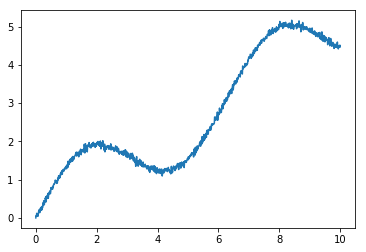

In [2]:
x = np.linspace(0,10,1000); y = np.sin(x) + x/2. + np.random.normal(0,0.05,size=1000)

plt.plot(x,y); plt.show()

# Bad
$y_t = X_{t}\theta + y_{t-1}$

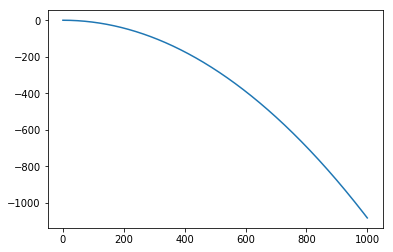

In [3]:
theta = np.random.randn()
val = [0]
for i in x:
    val.append(i * theta + val[-1])
    
plt.plot(val); plt.show()

# Problems with Standard RNNs
* Vanishing/Exploding Gradients


<center><img src="https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/64293031_2463195480360338_7966350304633421824_n.jpg?_nc_cat=101&_nc_oc=AQmzJ_fm1xercvZiqNoZOl733JVkharS7pNwRZMzD8C_TiCMJdvuIbjKK5kFouJFLl2wZ2_igGjIZEYu9Vdp9D4z&_nc_ht=scontent-sjc3-1.xx&oh=9c59b1c112a09d594bc056bc021abe7b&oe=5DA6B635" width=600>

# Long Short Term Memory (LSTM)
<center><img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" width=1000>

<center><img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM2-notation.png" width="650">

# Cell State
![](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-C-line.png)

# Forget Gate

![](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png)

# Forget Gate

<center><img src="https://thumbs.gfycat.com/SecondhandGiantJanenschia-poster.jpg" width=800>

# Input Gate
![](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png)

# Cell State Update
![](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png)

# Output Gate
![](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png)

# Gated Recurrent Unit (GRU)
![](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png)

# LSTMs in Keras

* **units:** Dimension of the output
* **input_shape:** (sequence length, dimension of the input features)
* **return_sequences:** Make predictions at every timestep or only the last one

In [2]:
units = 10
sequence_length = None # variable sequence len
input_feature_dim = 5 
return_sequences = True

In [3]:
model = Sequential()

In [4]:
model.add(LSTM(units, input_shape=(sequence_length, input_feature_dim), return_sequences=return_sequences))

In [5]:
model.add(Dense(13))

In [6]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 10)          640       
_________________________________________________________________
dense_1 (Dense)              (None, None, 13)          143       
Total params: 783
Trainable params: 783
Non-trainable params: 0
_________________________________________________________________


# Return a Sequence
* For every element in the sequence return a prediction
* What should the shape of our prediction be?

In [9]:
batch_size = 1
sequence_length = 100

fake_data = np.random.randn(batch_size, sequence_length, input_feature_dim)

In [10]:
model.predict(fake_data).shape

(1, 100, 13)

# Don't Return a Sequence
* Only return the last element of the predicted sequence

In [11]:
model = Sequential()
model.add(LSTM(units, input_shape=(sequence_length, input_feature_dim), return_sequences=False))
model.add(Dense(13))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                143       
Total params: 783
Trainable params: 783
Non-trainable params: 0
_________________________________________________________________


In [14]:
batch_size = 1; sequence_length = 100
fake_data = np.random.randn(batch_size, sequence_length, input_feature_dim)
fake_data.shape

(1, 100, 5)

In [13]:
model.predict(fake_data).shape

(1, 13)

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values; dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1

# Load Dataset

In [35]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshaping
* Data needs to be of shape (batch, sequence, input feature)

In [36]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((94, 1), (94,), (46, 1), (46,))

In [37]:
# reshape
trainX = trainX.reshape(1,94,1)
trainY = trainY.reshape(1,94,1)
testX = testX.reshape(1,46,1)
testY = testY.reshape(1,46,1)

In [38]:
trainX.shape, trainY.shape, testX.shape, testY.shape


((1, 94, 1), (1, 94, 1), (1, 46, 1), (1, 46, 1))

# Build the Model
* 

In [27]:
model = Sequential()
model.add(LSTM(units, input_shape=(None, 1), return_sequences=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, None, 10)          480       
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


# Training
* Train your model for 100 epochs


In [46]:
model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=500,
    verbose=2
)

Train on 1 samples, validate on 1 samples
Epoch 1/500
 - 0s - loss: 0.0038 - val_loss: 0.0517
Epoch 2/500
 - 0s - loss: 0.0037 - val_loss: 0.0518
Epoch 3/500
 - 0s - loss: 0.0037 - val_loss: 0.0520
Epoch 4/500
 - 0s - loss: 0.0036 - val_loss: 0.0522
Epoch 5/500
 - 0s - loss: 0.0036 - val_loss: 0.0525
Epoch 6/500
 - 0s - loss: 0.0036 - val_loss: 0.0528
Epoch 7/500
 - 0s - loss: 0.0035 - val_loss: 0.0532
Epoch 8/500
 - 0s - loss: 0.0035 - val_loss: 0.0535
Epoch 9/500
 - 0s - loss: 0.0035 - val_loss: 0.0538
Epoch 10/500
 - 0s - loss: 0.0035 - val_loss: 0.0541
Epoch 11/500
 - 0s - loss: 0.0035 - val_loss: 0.0544
Epoch 12/500
 - 0s - loss: 0.0035 - val_loss: 0.0546
Epoch 13/500
 - 0s - loss: 0.0035 - val_loss: 0.0548
Epoch 14/500
 - 0s - loss: 0.0035 - val_loss: 0.0549
Epoch 15/500
 - 0s - loss: 0.0035 - val_loss: 0.0550
Epoch 16/500
 - 0s - loss: 0.0035 - val_loss: 0.0551
Epoch 17/500
 - 0s - loss: 0.0035 - val_loss: 0.0551
Epoch 18/500
 - 0s - loss: 0.0035 - val_loss: 0.0551
Epoch 19/500


Epoch 154/500
 - 0s - loss: 0.0032 - val_loss: 0.0737
Epoch 155/500
 - 0s - loss: 0.0032 - val_loss: 0.0738
Epoch 156/500
 - 0s - loss: 0.0032 - val_loss: 0.0739
Epoch 157/500
 - 0s - loss: 0.0032 - val_loss: 0.0739
Epoch 158/500
 - 0s - loss: 0.0032 - val_loss: 0.0740
Epoch 159/500
 - 0s - loss: 0.0032 - val_loss: 0.0741
Epoch 160/500
 - 0s - loss: 0.0032 - val_loss: 0.0742
Epoch 161/500
 - 0s - loss: 0.0032 - val_loss: 0.0742
Epoch 162/500
 - 0s - loss: 0.0032 - val_loss: 0.0743
Epoch 163/500
 - 0s - loss: 0.0032 - val_loss: 0.0744
Epoch 164/500
 - 0s - loss: 0.0032 - val_loss: 0.0744
Epoch 165/500
 - 0s - loss: 0.0032 - val_loss: 0.0745
Epoch 166/500
 - 0s - loss: 0.0032 - val_loss: 0.0746
Epoch 167/500
 - 0s - loss: 0.0032 - val_loss: 0.0746
Epoch 168/500
 - 0s - loss: 0.0032 - val_loss: 0.0747
Epoch 169/500
 - 0s - loss: 0.0032 - val_loss: 0.0747
Epoch 170/500
 - 0s - loss: 0.0032 - val_loss: 0.0748
Epoch 171/500
 - 0s - loss: 0.0032 - val_loss: 0.0749
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.0030 - val_loss: 0.0829
Epoch 307/500
 - 0s - loss: 0.0030 - val_loss: 0.0829
Epoch 308/500
 - 0s - loss: 0.0030 - val_loss: 0.0830
Epoch 309/500
 - 0s - loss: 0.0030 - val_loss: 0.0831
Epoch 310/500
 - 0s - loss: 0.0030 - val_loss: 0.0831
Epoch 311/500
 - 0s - loss: 0.0030 - val_loss: 0.0832
Epoch 312/500
 - 0s - loss: 0.0030 - val_loss: 0.0832
Epoch 313/500
 - 0s - loss: 0.0030 - val_loss: 0.0833
Epoch 314/500
 - 0s - loss: 0.0030 - val_loss: 0.0834
Epoch 315/500
 - 0s - loss: 0.0030 - val_loss: 0.0834
Epoch 316/500
 - 0s - loss: 0.0030 - val_loss: 0.0835
Epoch 317/500
 - 0s - loss: 0.0030 - val_loss: 0.0836
Epoch 318/500
 - 0s - loss: 0.0030 - val_loss: 0.0836
Epoch 319/500
 - 0s - loss: 0.0030 - val_loss: 0.0837
Epoch 320/500
 - 0s - loss: 0.0030 - val_loss: 0.0837
Epoch 321/500
 - 0s - loss: 0.0030 - val_loss: 0.0838
Epoch 322/500
 - 0s - loss: 0.0030 - val_loss: 0.0839
Epoch 323/500
 - 0s - loss: 0.0030 - val_loss: 0.0839
Epoch 324/500
 - 0s - loss: 

KeyboardInterrupt: 

# Predictions

In [47]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testY)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict.reshape(1,-1)).squeeze()
un_trainY = scaler.inverse_transform([trainY.squeeze()]).squeeze()
testPredict = scaler.inverse_transform(testPredict.reshape(1,-1)).squeeze()
un_testY = scaler.inverse_transform([testY.squeeze()]).squeeze()

# Plotting
* True training data
* Predicted training data, true test data, and 

In [48]:
from IPython.core.pylabtools import figsize
figsize(14, 7)

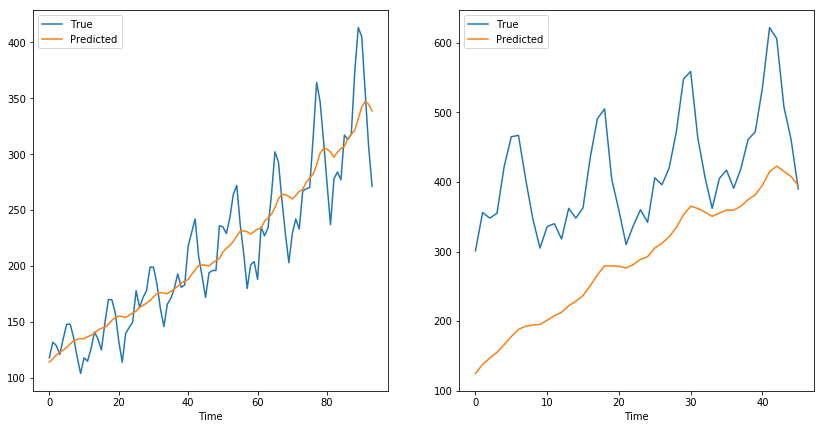

In [49]:
plt.subplot(1,2,1)
plt.plot(un_trainY, label='True')
plt.plot(trainPredict, label='Predicted')

plt.legend(); plt.xlabel('Time');

plt.subplot(1,2,2)
plt.plot(un_testY, label='True')
plt.plot(testPredict, label='Predicted')

plt.legend(); plt.xlabel('Time');

# Natural Language Processing

# Word Embeddings
* Why do we need word embeddings?
* What is wrong with one hot encoding?
<center>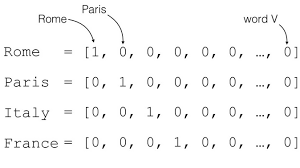

<center><img src="https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2018/01/word-vector-space-similar-words.png">

<img src='https://miro.medium.com/max/3010/1*sXNXYfAqfLUeiDXPCo130w.png'>

# Word2Vec
<center><img src='https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/45458iDEB69E518EBA3AD9/image-size/large?v=1.0&px=999'>

# RNNs for Language Modeling
* Why is using a fully connected (dense) model a bad idea?

* Language has temporal information
* Just like images have spatial information

<center><img src='https://miro.medium.com/max/632/1*JxlLbEz9M8-SOmzFiz0kBQ.png' width=1000>

# Embedding Layer

In [ ]:
keras.layers.Embedding(
    input_dim, 
    output_dim, 
    embeddings_initializer='uniform', 
    embeddings_regularizer=None, 
    activity_regularizer=None, 
    embeddings_constraint=None, 
    mask_zero=False, 
    input_length=None
)

# References
[Understanding LSTMs](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)